In [1]:
import numpy as np
import scipy.io as sio
import os
import cv2
from FeatureExtractor import FeatureExtractor
import h5py
import pickle
import json
from scipy.spatial.distance import cdist
from copy import *
from myresize import myresize
import math

# target vc
vc = 1
thres4 = 0.42
Astride = 16
Apad = 42
Arf = 100
scale_size=224

file_path = '/export/home/qliu24/qing_voting_data/intermediate/feat_car/'
filename = file_path + 'car_mergelist_rand_train_car_pool4_vMFMM.pickle'

with open(filename, 'rb') as fh:
    layer_feature, _ = pickle.load(fh)
    
dict_file='/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_imagenet_car_vgg16_pool4_K176_norm_nowarp_prune_512.pickle'
with open(dict_file, 'rb') as fh:
    _, centers = pickle.load(fh)

centers = centers/np.sqrt(np.sum(centers**2, axis=1)).reshape(-1,1)


dir_img = '/export/home/qliu24/dataset/PASCAL3D+_release1.1/Images/car_imagenet/'
dir_anno = '/export/home/qliu24/dataset/PASCAL3D+_release1.1/Annotations/car_imagenet/'
file_list = '/export/home/qliu24/qing_voting_139/qing_voting_py/intermediate/ground_truth_data/car_mergelist_rand_train.txt'

with open(file_list, 'r') as fh:
    content = fh.readlines()

img_list = [x.strip().split() for x in content]
img_num = len(img_list)
assert(img_num == len(layer_feature))
print('total number of images for {1}: {0}'.format(img_num, 'car'))

vc_patch_ls = []
for nn in range(img_num):
    file_img = os.path.join(dir_img, '{0}.JPEG'.format(img_list[nn][0]))
    assert(os.path.isfile(file_img))
    img = cv2.imread(file_img)
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.show()

    height, width = img.shape[0:2]

    file_anno = os.path.join(dir_anno, '{0}.mat'.format(img_list[nn][0]))
    assert(os.path.isfile(file_anno))
    mat_contents = sio.loadmat(file_anno)
    record = mat_contents['record']
    objects = record['objects']
    bbox = objects[0,0]['bbox'][0,int(img_list[nn][1])-1][0]
    bbox = [max(math.ceil(bbox[0]), 1), max(math.ceil(bbox[1]), 1), \
            min(math.floor(bbox[2]), width), min(math.floor(bbox[3]), height)]
    patch = img[bbox[1]-1: bbox[3], bbox[0]-1: bbox[2], :]
    # patch = cv2.resize(patch, (scale_size, scale_size))
    patch = myresize(patch, scale_size, 'short')
    pheight, pwidth = patch.shape[0:2]
    
    
    iheight,iwidth = layer_feature[nn].shape[0:2]
    lff = layer_feature[nn].reshape(-1, 512)
    lff_norm = lff/np.sqrt(np.sum(lff**2, 1)).reshape(-1,1)
    lfd = cdist(lff_norm, centers, 'cosine').reshape(iheight,iwidth,-1)
    rff, cff = np.where(lfd[:,:,vc] < thres4)
    irff = Astride * rff - Apad
    icff = Astride * cff - Apad
    
    for rii, cii in zip(irff, icff):
        if rii >=0 and rii <= pheight-Arf and cii >=0 and cii <= pwidth-Arf:
            fpatch = np.expand_dims(patch[rii:rii+Arf, cii:cii+Arf, :], axis=0)
            vc_patch_ls.append(fpatch)

vc_patch_ls = np.concatenate(vc_patch_ls, axis=0)
print(vc_patch_ls.shape)
if vc_patch_ls.shape[0]>1999:
    vc_patch_ls = vc_patch_ls[np.random.permutation(vc_patch_ls.shape[0])[0:1999],:,:,:]
    
print(vc_patch_ls.shape)

total number of images for car: 1000
(6841, 100, 100, 3)
(1999, 100, 100, 3)


In [6]:
import numpy as np
import scipy.io as sio
import os
import cv2
from FeatureExtractor import FeatureExtractor
import h5py
import pickle
import json
from scipy.spatial.distance import cdist
from copy import *

def normalize_features(features):
    '''features: n by d matrix'''
    assert(len(features.shape)==2)
    return features/np.sqrt(np.sum(features**2, axis=1).reshape(-1,1))

dict4 = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_imagenet_car_vgg16_pool4_K176_norm_nowarp_prune_512.pickle'
dict3 = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_imagenet_car_vgg16_pool3_K223_norm_nowarp_prune_512.pickle'

with open(dict4, 'rb') as fh:
    _, centers4 = pickle.load(fh)
    
with open(dict3, 'rb') as fh:
    _, centers3 = pickle.load(fh)
    
centers4 = normalize_features(centers4)
centers3 = normalize_features(centers3)

vc4_num = centers4.shape[0]
vc3_num = centers3.shape[0]
cihang_mean_RGB = np.float32([[[122.7717, 115.9465, 102.9801]]])

thres4 = 0.42
thres3 = 0.31
cache_dir = '/export/home/qliu24/qing_voting_139/qing_voting_py/cache/'
extractor = FeatureExtractor(cache_folder = cache_dir, layer_names = ['pool3/MaxPool:0', 'pool4/MaxPool:0'])

adv_file_dir = '/export/home/qliu24/VC_adv_data/cihang/'

image_list = []
image_list_ori = []
vc_ori_list = []
    

2017-07-13 17:32:40.106254: Start Init
INFO:tensorflow:Restoring parameters from /export/home/qliu24/qing_voting_139/qing_voting_py/cache/checkpoints_vgg/vgg_16.ckpt
2017-07-13 17:32:40.644480: Finish Init


In [52]:
import numpy as np
import scipy.io as sio
import os
import cv2
from FeatureExtractor import FeatureExtractor
import h5py
import pickle
import json
from scipy.spatial.distance import cdist
from copy import *
from myresize import myresize
import math

file1 = '/export/home/qliu24/VC_adv_data/feng/adversial_samples_vc4_vMFMM_2000.mat'
file2 = '/export/home/qliu24/VC_adv_data/feng/original_samples_vc4_vMFMM_2000.mat'
ff = h5py.File(file1)
sample = np.array(ff[ff['adversial_samples'][0][0]].value).astype(float)
print(sample.shape)


(2000, 3, 100, 100)


-5.0 260.000007629


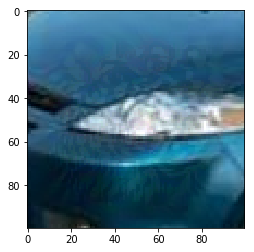

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
vgg_mean = np.float32([103.939, 116.779, 123.68])
# sample = np.array(matcontent['adversial_samples'][10][0][:,:,:,49]).astype(float)
sample = np.transpose(sample, [0,2,3,1]) + vgg_mean
sample = sample[:,:,:,[2,1,0]]
print(np.min(sample), np.max(sample))
sample = np.maximum(sample, 0)
sample = np.minimum(sample, 255)
sample = sample.astype('uint8')
plt.imshow(sample[49])
plt.show()

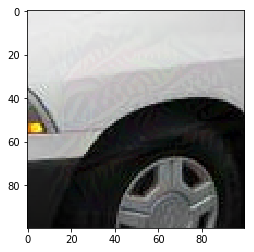

In [54]:
plt.imshow(sample[77])
plt.show()

In [47]:
np.min(sample[49])

0